# Causal Identification in DAGs using Backdoor and Swigs, Equivalence Classes, Falsifiability Tests
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Indraos/Actions_Test/blob/main/dagitty.ipynb)

In [1]:
%pip install rpy2
%load_ext rpy2.ipython
import numpy as np
import statsmodels.formula.api as smf
import rpy2
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

Note: you may need to restart the kernel to use updated packages.


In [2]:
%%R
install.packages("dagitty")
install.packages("ggdag")
library(dagitty)
library(ggdag)

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (BA) [https]
 9: Brazil (PR) [https]
10: Brazil (RJ) [https]
11: Brazil (SP 1) [https]
12: Brazil (SP 2) [https]
13: Bulgaria [https]
14: Canada (MB) [https]
15: Canada (ON 2) [https]
16: Chile (Santiago) [https]
17: China (Beijing 2) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 1) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Costa Rica [https]
27: Czech Republic [https]
28: Denmark [https]
29: East Asia [https]
30: Ecuador (Cuenca) [https]
31: Ecuador (Quito) [https]
32: Estonia [https]
33: France (Lyon 1) [https]
34: France (Lyon 2) [https]


Selection:  81


R[write to console]: trying URL 'https://cran.microsoft.com/src/contrib/dagitty_0.3-1.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 132745 bytes (129 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

# Graph Generation and Plotting 

The following DAG is due to Judea Pearl

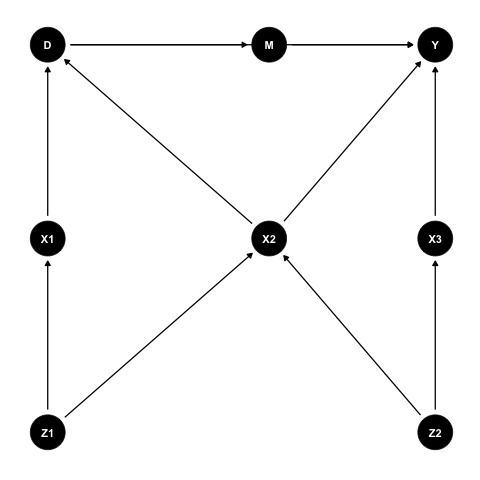

In [3]:
%%R
G = dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
D -> Y
X2 -> Y
X2 -> D
M->Y
D->M
}')


ggdag(G)+  theme_dag()

# Report Relatives of X2

In [5]:
%%R
print(parents(G, "X2"))
print(children(G, "X2"))
print(ancestors(G, "X2"))
print(descendants(G, "X2"))

[1] "Z1" "Z2"
[1] "D" "Y"
[1] "X2" "Z2" "Z1"
[1] "X2" "Y"  "D"  "M" 


# Find Paths Between D and Y



In [6]:
%%R
paths(G, "D", "Y")

$paths
[1] "D -> M -> Y"                         
[2] "D -> Y"                              
[3] "D <- X1 <- Z1 -> X2 -> Y"            
[4] "D <- X1 <- Z1 -> X2 <- Z2 -> X3 -> Y"
[5] "D <- X2 -> Y"                        
[6] "D <- X2 <- Z2 -> X3 -> Y"            

$open
[1]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE



# List All Testable Implications of the Model

In [7]:
%%R
print(impliedConditionalIndependencies(G))

D _||_ X3 | Z2
D _||_ X3 | X2, Z1
D _||_ X3 | X1, X2
D _||_ Z1 | X1, X2
D _||_ Z2 | X2, Z1
D _||_ Z2 | X1, X2
M _||_ X1 | D
M _||_ X2 | D
M _||_ X3 | Z2
M _||_ X3 | X2, Z1
M _||_ X3 | X1, X2
M _||_ X3 | D
M _||_ Z1 | X1, X2
M _||_ Z1 | D
M _||_ Z2 | X2, Z1
M _||_ Z2 | X1, X2
M _||_ Z2 | D
X1 _||_ X2 | Z1
X1 _||_ X3
X1 _||_ Y | D, X2, X3
X1 _||_ Y | D, X2, Z2
X1 _||_ Y | D, X2, Z1
X1 _||_ Z2
X2 _||_ X3 | Z2
X3 _||_ Z1
Y _||_ Z1 | X1, X2, Z2
Y _||_ Z1 | D, X2, Z2
Y _||_ Z1 | X1, X2, X3
Y _||_ Z1 | D, X2, X3
Y _||_ Z2 | X2, X3, Z1
Y _||_ Z2 | X1, X2, X3
Y _||_ Z2 | D, X2, X3
Z1 _||_ Z2


# Identification by Backdoor: List minimal adjustment sets to identify causal effecs $D \to Y$

In [8]:
%%R
print(adjustmentSets( G, "D", "Y" ))

{ X2, X3 }
{ X2, Z2 }
{ X2, Z1 }
{ X1, X2 }


# Identification via SWIG and D-separation

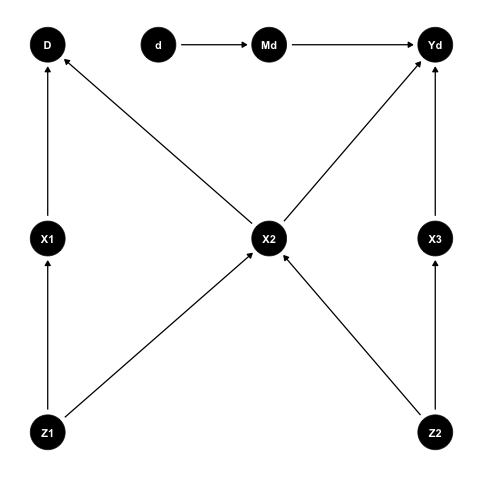

In [9]:
%%R
SWIG = dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Yd [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
d [pos="-1, 1.5"]
Md [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Yd
Z2 -> X2
X2 -> Yd
X2 -> D
X3-> Yd
Md-> Yd
d-> Md
}')

ggdag(SWIG)+  theme_dag()


# Deduce Conditional Exogeneity or Ignorability by D-separation


In [10]:
%%R
print(impliedConditionalIndependencies(SWIG)[5:8])

D _||_ Yd | X2, X3
D _||_ Yd | X2, Z2
D _||_ Yd | X2, Z1
D _||_ Yd | X1, X2


This coincides with the backdoor criterion for this graph.

# Print All Average Effects Identifiable by Conditioning

In [11]:
%%R 
for( n in names(G) ){
    for( m in children(G,n) ){
        a <- adjustmentSets( G, n, m )
        if( length(a) > 0 ){
            cat("The effect ",n,"->",m,
                " is identifiable by controlling for:\n",sep="")
            print( a, prefix=" * " )
        }
    }
}

The effect D->M is identifiable by controlling for:
 *  {}
The effect D->Y is identifiable by controlling for:
{ X2, X3 }
{ X2, Z2 }
{ X2, Z1 }
{ X1, X2 }
The effect M->Y is identifiable by controlling for:
{ D }
The effect X1->D is identifiable by controlling for:
{ X2 }
{ Z1 }
The effect X2->D is identifiable by controlling for:
{ X1 }
{ Z1 }
The effect X2->Y is identifiable by controlling for:
{ X1, X3 }
{ X1, Z2 }
{ X3, Z1 }
{ Z1, Z2 }
The effect X3->Y is identifiable by controlling for:
{ D, X2 }
{ X1, X2 }
{ X2, Z1 }
{ Z2 }
The effect Z1->X1 is identifiable by controlling for:
 *  {}
The effect Z1->X2 is identifiable by controlling for:
 *  {}
The effect Z2->X2 is identifiable by controlling for:
 *  {}
The effect Z2->X3 is identifiable by controlling for:
 *  {}


# Equivalence Classes

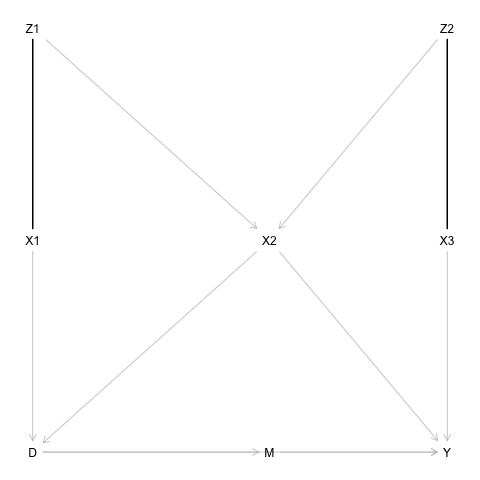

In [12]:
%%R
P=equivalenceClass(G)
plot(P)

Next Consider the elemntary Triangular Model:
$$
D \to Y, \quad X \to (D,Y).
$$
This model has not testable implications and is Markov-equivalent to any other DAG difined on names $(X, D, Y)$.

In [13]:
%%R
G3<- dagitty('dag{
D -> Y
X -> D
X -> Y
}
')
ggdag(G3)+  theme_dag()
print(impliedConditionalIndependencies(G3))

R[write to console]: Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



[[1]]
dag {
D
X
Y
D -> Y
X -> D
X -> Y
}

[[2]]
dag {
D
X
Y
D -> X
D -> Y
X -> Y
}

[[3]]
dag {
D
X
Y
D -> X
D -> Y
Y -> X
}

[[4]]
dag {
D
X
Y
X -> D
X -> Y
Y -> D
}

[[5]]
dag {
D
X
Y
X -> D
Y -> D
Y -> X
}

[[6]]
dag {
D
X
Y
D -> X
Y -> D
Y -> X
}



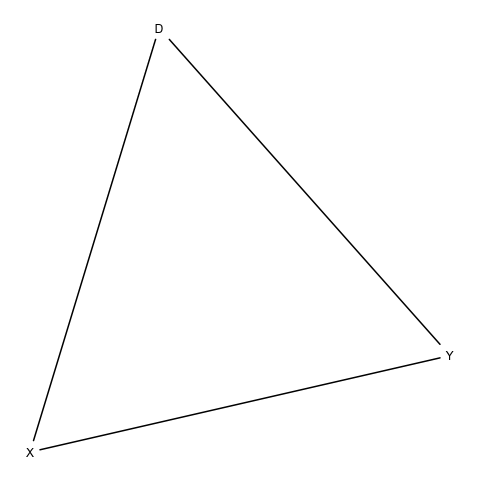

In [14]:
%%R
P=equivalenceClass(G3)
plot(P)
equivalentDAGs(G3,10)

# Example of Testing DAG Validity

Next we simulate the data from a Linear SEM associated to DAG G, and perform a test of conditional independence restrictions, exploting linearity. 


There are many other options for nonlinear models and discrete categorical variabales. Type help(localTests). 

In [15]:
%%R
x <- simulateSEM(G)
localTests(G, data = x, type = c("cis"))

                            estimate    p.value         2.5%        97.5%
D _||_ X3 | Z2          0.0573029231 0.20139181 -0.030629631  0.144359516
D _||_ X3 | X2, Z1      0.0975447181 0.02946895  0.009761735  0.183849887
D _||_ X3 | X1, X2      0.0960110903 0.03213622  0.008213732  0.182353085
D _||_ Z1 | X1, X2     -0.0574520751 0.20067278 -0.144593066  0.030568893
D _||_ Z2 | X2, Z1     -0.0411755497 0.35934369 -0.128579370  0.046860656
D _||_ Z2 | X1, X2     -0.0307573431 0.49364460 -0.118305823  0.057264107
M _||_ X1 | D           0.0298550953 0.50598513 -0.058075630  0.117327602
M _||_ X2 | D           0.0063558888 0.88743209 -0.081468289  0.094082379
M _||_ X3 | Z2          0.0003006921 0.99465682 -0.087480446  0.088077208
M _||_ X3 | X2, Z1     -0.0240438708 0.59261841 -0.111675754  0.063957972
M _||_ X3 | X1, X2     -0.0220216375 0.62411286 -0.109677131  0.065972751
M _||_ X3 | D           0.0311329410 0.48794083 -0.056800810  0.118588923
M _||_ Z1 | X1, X2      0.0791719397 0

Next we replaced $D$ by $\bar D$ generated differently:
$$
\bar D= (D + Y)/2
$$
So basically $\bar D$ is an average of $D$ and $Y$ generated by $D$.  We then test if the resulting collection of random variables satisifes conditional indepdendence restrictions, exploiting linearity.  We end up rejectiong these restrictions and thefore the validity of this model for the data generated in this way.  This makes sense, because the new data no longer obeys the previous DAG structure.



In [19]:
%%R
x.R <- x
x.R$D <- (x$D+ x$Y)/2
localTests(G, data = x.R, type = c("cis"))

                            estimate      p.value         2.5%        97.5%
D _||_ X3 | Z2         -0.2085383494 2.434883e-06 -0.291133583 -0.123013500
D _||_ X3 | X2, Z1     -0.2227571996 4.642214e-07 -0.304841687 -0.137586768
D _||_ X3 | X1, X2     -0.2224644197 4.811378e-07 -0.304561367 -0.137284505
D _||_ Z1 | X1, X2      0.0085888823 8.484510e-01 -0.079337852  0.096383351
D _||_ Z2 | X2, Z1      0.0635657870 1.567290e-01 -0.024437354  0.150596541
D _||_ Z2 | X1, X2      0.0616704292 1.694964e-01 -0.026338947  0.148736028
M _||_ X1 | D           0.0775181355 8.365147e-02 -0.010330645  0.164187501
M _||_ X2 | D           0.2494082473 1.392910e-08  0.165255762  0.330234311
M _||_ X3 | Z2          0.0003006921 9.946568e-01 -0.087480446  0.088077208
M _||_ X3 | X2, Z1     -0.0240438708 5.926184e-01 -0.111675754  0.063957972
M _||_ X3 | X1, X2     -0.0220216375 6.241129e-01 -0.109677131  0.065972751
M _||_ X3 | D           0.0115350652 7.972486e-01 -0.076320871  0.099213738
M _||_ Z1 | 